In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import urllib 
import requests
import urllib.request
from tempfile import NamedTemporaryFile

from matplotlib import ticker
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D


from PIL import Image
from io import BytesIO

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/' \
    'master/data/2021/2021-03-16/games.csv'
)

In [3]:
# hopefully this counts as using `lubridate` :)
df['date'] = pd.to_datetime(df['year'].astype(str)  + df['month'], format='%Y%B')
df['month_num'] = df.sort_values(by=['gamename','date']).groupby('gamename').cumcount()

In [4]:
filt = df.groupby('gamename').agg({'avg':'mean','peak':'max'}).reset_index()
filt['virality'] = df.avg / df.peak
filt = list(filt.loc[filt.avg >= 10000].sort_values(by='virality').gamename)

In [5]:
busts = df.groupby('gamename').filter(lambda x : x['avg'][x['month_num']==0] == x['avg'].max())

set(busts.loc[busts.gamename.isin(filt)].gamename)

{'Borderlands 3',
 'Crusader Kings III',
 'Cyberpunk 2077',
 'DARK SOULS\x99 III',
 'Destiny 2',
 'Dota Underlords',
 'Fall Guys: Ultimate Knockout',
 'Fallout 4',
 'Farming Simulator 19',
 'Grand Theft Auto V',
 'Monster Hunter: World',
 'Phasmophobia',
 'Sea of Thieves',
 "Sid Meier's Civilization VI",
 'The Witcher 3: Wild Hunt'}

In [6]:
palette = {
     'Fall Guys: Ultimate Knockout':'#e44fa0',
     'Fallout 4':'#efc292',
     'Cyberpunk 2077':'#f9eb50',
     'Monster Hunter: World':'#99b769',
 }

palette2 = {
     "Sid Meier's Civilization VI":'tan',
     'DARK SOULS III':'silver',
     'Dota Underlords':'gold',
     'Borderlands 3':'white',
     'The Witcher 3: Wild Hunt':'burlywood',
 }

In [95]:
github_url = 'https://github.com/google/fonts/blob/main/ofl/staatliches/Staatliches-Regular.ttf'

url = github_url + '?raw=true'

response = urllib.request.urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()

prop = fm.FontProperties(fname=f.name)

In [131]:
github_url = 'https://github.com/google/fonts/blob/main/ofl/lato/Lato-Regular.ttf'


url = github_url + '?raw=true'

response = urllib.request.urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()

prop2 = fm.FontProperties(fname=f.name)

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


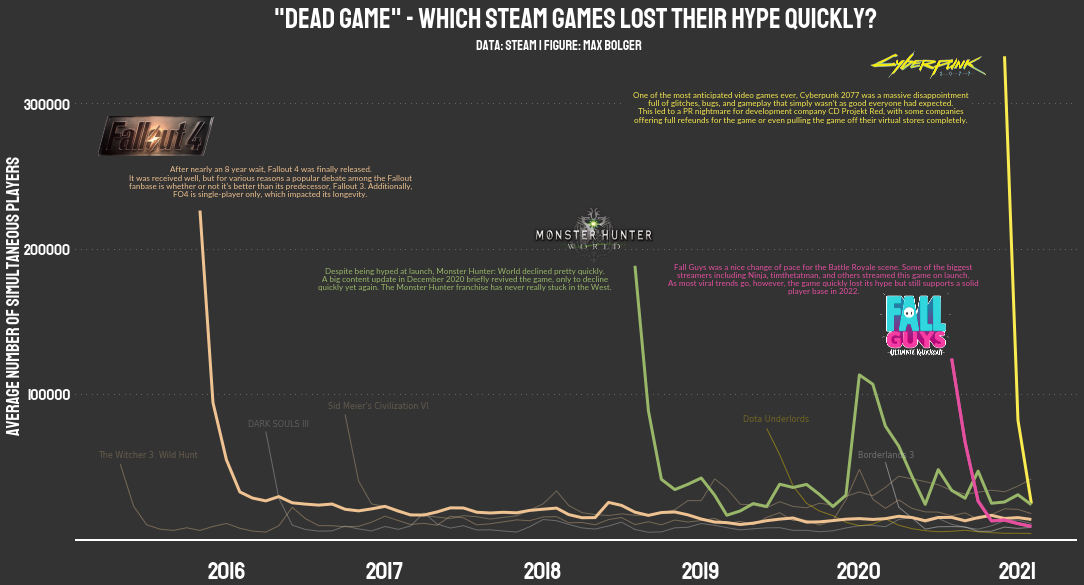

In [142]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(16,9),facecolor='#333333',edgecolor='#333333')

ax.set_facecolor("#333333")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(zorder=0,alpha=0)

for j in ['left','right','top','bottom']:
  ax.spines[j].set_visible(False)

for label in ax.get_xticklabels():
  label.set_fontproperties(prop)

for label in ax.get_yticklabels():
  label.set_fontproperties(prop)

ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=24)

plt.title('"Dead Game" - Which Steam Games Lost Their Hype Quickly?',fontproperties=prop,fontsize=28,color='white')

l2 = df.loc[df.gamename.isin(list(palette2.keys()))]

sns.lineplot(x=l2.date, 
             y=l2.avg, 
             data=l2, 
             hue=l2.gamename,
             palette=palette2,
             linewidth=1,
             alpha=0.4
             )

l1 = df.loc[df.gamename.isin(list(palette.keys()))]

sns.lineplot(x=l1.date, 
             y=l1.avg, 
             data=l1, 
             hue=l1.gamename,
             palette=palette,
             linewidth=3
             )

fg = df.loc[df.gamename=='Fall Guys: Ultimate Knockout']
sns.lineplot(x=fg.date, 
             y=fg.avg, 
             data=fg, 
             c='#e44fa0',
             linewidth=3
             )

plt.xlabel('')
plt.ylabel('Average Number of Simultaneous Players',fontproperties=prop,color='white',fontsize=18)

plt.figtext(0.25,0.65,
    'After nearly an 8 year wait, Fallout 4 was finally released.\n' \
    'It was received well, but for various reasons a popular debate among the Fallout\n' \
    "fanbase is whether or not it's better than its predecessor, Fallout 3. Additionally,\n" \
    'FO4 is single-player only, which impacted its longevity.',
    fontproperties=prop2,color='#efc292',fontsize=8,ha='center',va='center')

plt.figtext(0.419,0.5,
    'Despite being hyped at launch, Monster Hunter: World declined pretty quickly.\n' \
    'A big content update in December 2020 briefly revived the game, only to decline\n' \
    'quickly yet again. The Monster Hunter franchise has never really stuck in the West.',
    fontproperties=prop2,color='#99b769',fontsize=8,ha='center',va='center')

plt.figtext(0.71,0.765,
    'One of the most anticipated video games ever, Cyberpunk 2077 was a massive disappointment\n' \
    "full of glitches, bugs, and gameplay that simply wasn't as good everyone had expected.\n" \
    'This led to a PR nightmare for development company CD Projekt Red, with some companies\n' \
    'offering full refeunds for the game or even pulling the game off their virtual stores completely.',
    fontproperties=prop2,color='#f9eb50',fontsize=8,ha='center',va='center')

plt.figtext(0.73,0.5,
    'Fall Guys was a nice change of pace for the Battle Royale scene. Some of the biggest\n' \
    'streamers including Ninja, timthetatman, and others streamed this game on launch.\n' \
    'As most viral trends go, however, the game quickly lost its hype but still supports a solid\n' \
    'player base in 2022.',
    fontproperties=prop2,color='#e44fa0',fontsize=8,ha='center',va='center')

cp = fig.add_axes([0.77,0.78,0.1,0.1])
cp.axis("off")
url_cp = "https://wallpapercave.com/wp/wp6501594.png"
response_cp = requests.get(url_cp)
img_cp = Image.open(BytesIO(response_cp.content))
cp.imshow(img_cp)

fg = fig.add_axes([0.76,0.38,0.1,0.1])
fg.axis("off")
url_fg = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.steamgriddb.com%2Flogo%2F8c2b7c5f9176bd359d4d42f4e9f9f15d.png&f=1&nofb=1"
response_fg = requests.get(url_fg)
img_fg = Image.open(BytesIO(response_fg.content))
fg.imshow(img_fg)

fo4 = fig.add_axes([0.1,0.67,0.1,0.1])
fo4.axis("off")
url_fo4 = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fnerdreactor.com%2Fwp-content%2Fuploads%2F2015%2F11%2FFallout_4_logo.png&f=1&nofb=1"
response_fo4 = requests.get(url_fo4)
img_fo4 = Image.open(BytesIO(response_fo4.content))
fo4.imshow(img_fo4)

mh = fig.add_axes([0.475,0.514,0.11,0.11])
mh.axis("off")
url_mh = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fvignette.wikia.nocookie.net%2Fmonsterhunterespanol%2Fimages%2F4%2F42%2FLogo-MHW.png%2Frevision%2Flatest%3Fcb%3D20180218123609%26path-prefix%3Des&f=1&nofb=1"
response_mh = requests.get(url_mh)
img_mh = Image.open(BytesIO(response_mh.content))
mh.imshow(img_mh)

ax.get_legend().remove()

ax.set_yticks([100000,200000,300000])

plt.figtext(0.3,0.3,"Sid Meier's Civilization VI",color='tan',alpha=0.3,fontsize=8)
plt.figtext(0.23,0.2725,'DARK SOULS III',color='silver',alpha=0.3,fontsize=8)
plt.figtext(0.66,0.28,'Dota Underlords',color='gold',alpha=0.3,fontsize=8)
plt.figtext(0.76,0.225,'Borderlands 3',color='white',alpha=0.3,fontsize=8)
plt.figtext(0.1,0.225,'The Witcher 3: Wild Hunt',color='burlywood',alpha=0.3,fontsize=8)

ax.axhline(y=0,color='white',linewidth=2)
ax.axhline(y=100000,color='white',linewidth=0.5,linestyle=(0, (1, 10)),zorder=0)
ax.axhline(y=200000,color='white',linewidth=0.5,linestyle=(0, (1, 10)),zorder=0)
ax.axhline(y=300000,xmin=0,xmax=0.545,color='white',linewidth=0.5,linestyle=(0, (1, 10)),zorder=0)
ax.axhline(y=300000,xmin=.895,xmax=1,color='white',linewidth=0.5,linestyle=(0, (1, 10)),zorder=0)

plt.figtext(0.5,0.862,'Data: Steam | Figure: Max Bolger',ha='center',va='center',fontproperties=prop, color='white',fontsize=14)

plt.savefig('wk6_hype.png',dpi=300,bbox_inches='tight',facecolor=fig.get_facecolor())

Checking out Battle Royales... fail (not very cool chart - PUBG ruins it)

In [35]:
br = [
      'Apex Legends',
      'Fall Guys: Ultimate Knockout',
      'NARAKA: BLADEPOINT',
      'Ring of Elysium',
      'Realm Royale',
      "PLAYERUNKNOWN'S BATTLEGROUNDS",
      'Bombergrounds: Battle Royale',
      'Z1 Battle Royale'
      ]

In [36]:
viz = df.loc[df.gamename.isin(br)].copy()

In [37]:
viz.groupby('gamename').avg.max()

gamename
Apex Legends                      120982.64
Fall Guys: Ultimate Knockout      124479.35
PLAYERUNKNOWN'S BATTLEGROUNDS    1584886.77
Realm Royale                       32811.94
Ring of Elysium                    27690.03
Z1 Battle Royale                   86807.87
Name: avg, dtype: float64

In [38]:
viz['date'] = pd.to_datetime(df['year'].astype(str)  + df['month'], format='%Y%B')

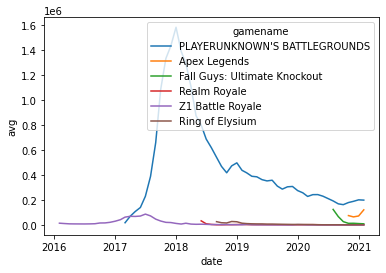

In [40]:
sns.lineplot(x=viz.date, y=viz.avg, data=viz, hue=viz.gamename)

In [7]:
def secondGreatest(x):
    y = np.sort(x)
    return y[-2] if len(y) > 1 else x

def gameMax(g):
  g['max'] = g.avg.max()
  # g['second_max'] = g.avg.apply(secondGreatest)
  g['game'] = g.gamename[g.avg.idxmax()]
  return g[['date','game','max']]

In [8]:
leaders = (df
           .groupby('date')
           .apply(gameMax)
           .merge(
               df.groupby('date').agg({'avg':secondGreatest}),
               on='date'
               )
           .rename(columns={'avg':'second_max'})
           )

leaders['diff'] = leaders['max'] - leaders.second_max
leaders = leaders.drop_duplicates().reset_index(drop=True)

In [9]:
leaders.game.value_counts()

Dota 2                              70
Counter-Strike: Global Offensive    17
PLAYERUNKNOWN'S BATTLEGROUNDS       16
Team Fortress 2                      1
Name: game, dtype: int64

In [10]:
leaders.groupby('game').agg({'date':'count','diff':'mean'})

,date,diff
game,,
Counter-Strike: Global Offensive,17,203007.882941
Dota 2,70,223595.936143
PLAYERUNKNOWN'S BATTLEGROUNDS,16,464586.845000
Team Fortress 2,1,5792.760000


In [11]:
github_url = 'https://github.com/google/fonts/blob/main/ofl/pressstart2p/PressStart2P-Regular.ttf'

url = github_url + '?raw=true'

response = urllib.request.urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()

prop3 = fm.FontProperties(fname=f.name)

In [12]:
github_url = 'https://github.com/google/fonts/blob/main/ofl/inter/Inter%5Bslnt%2Cwght%5D.ttf'

url = github_url + '?raw=true'

response = urllib.request.urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()

prop4 = fm.FontProperties(fname=f.name)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


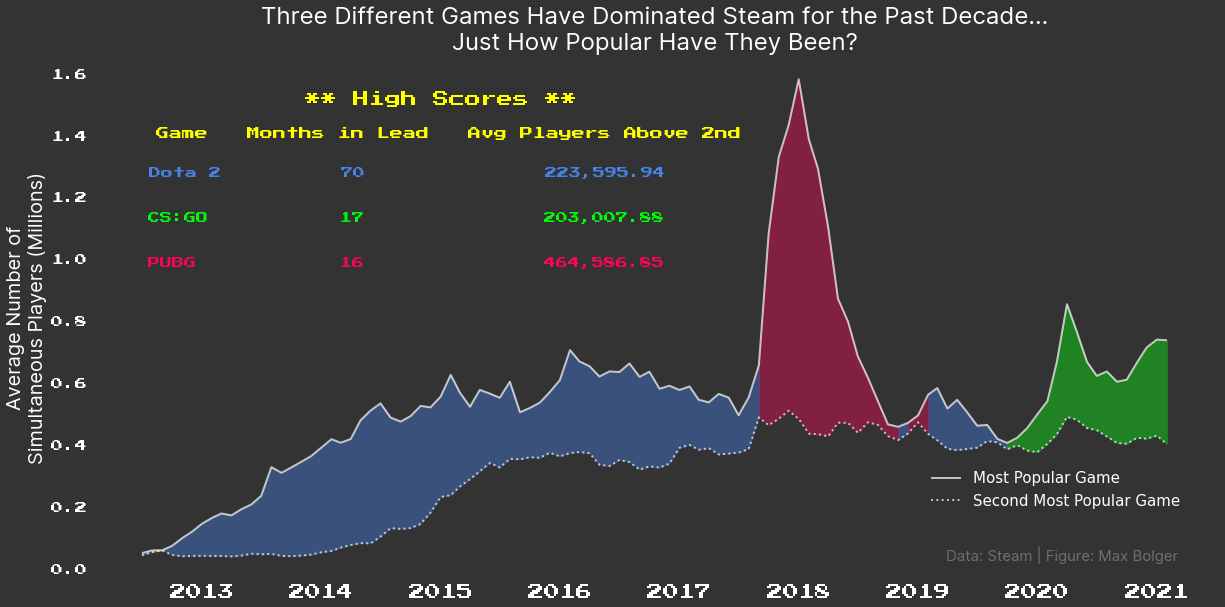

In [38]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(18,9),facecolor='#333333',edgecolor='#333333')

ax.set_facecolor("#333333")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(zorder=0,alpha=0)

for j in ['left','right','top','bottom']:
  ax.spines[j].set_visible(False)

for label in ax.get_xticklabels():
  label.set_fontproperties(prop3)

for label in ax.get_yticklabels():
  label.set_fontproperties(prop3)

ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=16)

leaders['max_m'] = leaders['max'] / 1000000
sns.lineplot(leaders.date,leaders['max_m'],data=leaders,linewidth=2,color='white',alpha=0.7)

leaders['second_max_m'] = leaders['second_max'] / 1000000
sns.lineplot(leaders.date,leaders.second_max_m,data=leaders,linewidth=2,color='white',linestyle = ':',alpha=0.7)

plt.xlabel('')
plt.ylabel('Average Number of\nSimultaneous Players (Millions)',fontproperties=prop4,color='white',fontsize=20)

plt.figtext(0.245,0.8,
            '** High Scores **',
            fontproperties=prop3,color='yellow',fontsize=16
            )

plt.figtext(0.13,0.75,
            'Game   Months in Lead   Avg Players Above 2nd',
            fontproperties=prop3,color='yellow',fontsize=13
            )

plt.figtext(0.125,0.69,
            'Dota 2          70               223,595.94 ',
            fontproperties=prop3,color='#4782e8',fontsize=12
            )

plt.figtext(0.1245,0.62,
            'CS:GO           17               203,007.88 ',
            fontproperties=prop3,color='#04f909',fontsize=12
            )

plt.figtext(0.1245,0.55,
            'PUBG            16               464,586.85 ',
            fontproperties=prop3,color='#f9045a',fontsize=12
            )

plt.title('Three Different Games Have Dominated Steam for the Past Decade...\nJust How Popular Have They Been?',fontproperties=prop4,fontsize=24,color='white')

legend = (ax
          .legend( 
              labels=['Most Popular Game','Second Most Popular Game'],
              loc = 'upper left',
              bbox_to_anchor = (.74, 0.22),
              ncol = 1,
              borderaxespad = 0,
              frameon = False,
              labelcolor='white',
              prop={'family': 'Inter', 'size': 15}
              )
          )

plt.figtext(0.74,0.1,"Data: Steam | Figure: Max Bolger",fontproperties=prop4, fontsize=15,color='white',alpha=0.3)

ax.fill_between(leaders['date'], leaders['max_m'], leaders['second_max_m'], where=leaders['date']>='2019-10-01',color = '#04f909',alpha=0.4)
ax.fill_between(leaders['date'], leaders['max_m'], leaders['second_max_m'], where=(leaders['date']<='2019-10-01') & (leaders['date']>='2019-02-01'),color = '#4782e8',alpha=0.4)
ax.fill_between(leaders['date'], leaders['max_m'], leaders['second_max_m'], where=(leaders['date']<='2019-02-01') & (leaders['date']>='2018-12-01'),color = '#f9045a',alpha=0.4)
ax.fill_between(leaders['date'], leaders['max_m'], leaders['second_max_m'], where=(leaders['date']<='2018-12-01') & (leaders['date']>='2018-11-01'),color = '#4782e8',alpha=0.4)
ax.fill_between(leaders['date'], leaders['max_m'], leaders['second_max_m'], where=(leaders['date']<='2018-11-01') & (leaders['date']>='2017-09-01'),color = '#f9045a',alpha=0.4)
ax.fill_between(leaders['date'], leaders['max_m'], leaders['second_max_m'], where=(leaders['date']<='2017-09-01') & (leaders['date']>='2012-09-01'),color = '#4782e8',alpha=0.4)
ax.fill_between(leaders['date'], leaders['max_m'], leaders['second_max_m'], where=(leaders['date']<='2012-09-01') & (leaders['date']>='2012-08-01'),color = '#fc8702',alpha=0.4)
ax.fill_between(leaders['date'], leaders['max_m'], leaders['second_max_m'], where=(leaders['date']<='2012-08-01') & (leaders['date']>='2012-07-01'),color = '#4782e8',alpha=0.4)

plt.savefig('wk6_leaders.png',dpi=300,bbox_inches='tight',facecolor=fig.get_facecolor())